# Example 04: Causal discovery within a range of features

-------------------------------------------

## Overview


 - AitiaExplorer allows you to set a higher and lower number of features for the causal discovery process.
 - In the example below, we set a number range and AitiaExplorer will start at the lower number of features and run the causal discovery analysis for each number in the range. The best performing results will then be returned.
 - This example is designed to show how AitiaExplorer can help narrow the choices for causal discovery.

### Imports

In [59]:
import os
import sys
import math
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycausal.pycausal import pycausal
from IPython.display import display, HTML

module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.app import App

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

### Set up for causal discovery

- First create an AitiaExplorer instance and using it to load some data into a pandas dataframe.
- We will be using the [HEPAR II](https://www.bnlearn.com/bnrepository/#hepar2) dataset.

In [4]:
aitia = App()

In [5]:
df = aitia.data.hepar2_10k_data()

In [6]:
df.head()

,alcoholism,vh_amn,hepatotoxic,THepatitis,hospital,surgery,gallstones,choledocholithotomy,injections,transfusion,...,spiders,jaundice,albumin,edge,irregular_liver,hbc_anti,hcv_anti,palms,hbeag,carcinoma
0,-0.406818,-0.462320,-0.296683,-0.21094,-1.071769,-0.862721,2.360149,2.517292,-0.810725,-0.442913,...,-0.515114,1.616390,-0.956489,-0.600145,2.58011,-0.322863,-0.04363,2.248763,-0.060108,-0.260176
1,-0.406818,-0.462320,-0.296683,-0.21094,-1.071769,1.159123,2.360149,2.517292,-0.810725,-0.442913,...,1.941318,1.616390,0.531284,1.666264,-0.38758,-0.322863,-0.04363,-0.444689,-0.060108,-0.260176
2,-0.406818,-0.462320,-0.296683,-0.21094,-1.071769,1.159123,-0.423702,-0.397252,1.233463,-0.442913,...,1.941318,-0.618663,0.531284,-0.600145,-0.38758,-0.322863,-0.04363,-0.444689,-0.060108,-0.260176
3,-0.406818,-0.462320,-0.296683,-0.21094,-1.071769,-0.862721,-0.423702,-0.397252,-0.810725,-0.442913,...,1.941318,-0.618663,0.531284,-0.600145,-0.38758,-0.322863,-0.04363,-0.444689,-0.060108,-0.260176
4,-0.406818,2.163005,-0.296683,-0.21094,-1.071769,-0.862721,-0.423702,-0.397252,-0.810725,-0.442913,...,-0.515114,-0.618663,0.531284,-0.600145,-0.38758,-0.322863,-0.04363,-0.444689,-0.060108,-0.260176


### Set up for causal discovery

- Next we will select the causal and feature selection algorithms and start the py-causal Java VM.

In [7]:
feature_selection_list = []
feature_selection_list.append(aitia.feature_selection.LINEAR_REGRESSION)
feature_selection_list.append(aitia.feature_selection.RANDOM_FOREST)

In [8]:
algorithm_list = []
algorithm_list.append(aitia.algo_runner.PC)
algorithm_list.append(aitia.algo_runner.RFCI_continuous)

In [9]:
pc = pycausal()
pc.start_vm()

- Now we will run the causal discovery with the number of feature set to a range between 10 and 20.

In [11]:
results, summary, target_graph, all_results = aitia.run_analysis_with_high_low( 
                                               df,
                                               target_graph_str=None, # no target graph, one will be created
                                               feature_high=20, feature_low=10,
                                               feature_selection_list=feature_selection_list,
                                               algorithm_list=algorithm_list,
                                               pc=pc)

No target graph has been supplied.
The system will generate an approximate target graph using the greedy hill climbing algorithm.
-----------------------------------------------
Starting analysis with 20 features...
Running causal discovery on features selected by LINEAR_REGRESSION
There are 0 latent edges in the reduced dataset
Running causal discovery using PC
Running causal discovery using RFCI-continuous
Completed causal discovery on features selected by LINEAR_REGRESSION
Running causal discovery on features selected by RANDOM_FOREST
There are 0 latent edges in the reduced dataset
Running causal discovery using PC
Running causal discovery using RFCI-continuous
Completed causal discovery on features selected by RANDOM_FOREST
Completed analysis.
Completed analysis with 20 features...
-----------------------------------------------
Starting analysis with 19 features...
Running causal discovery on features selected by LINEAR_REGRESSION
There are 0 latent edges in the reduced dataset
Ru

### Display the results

- The summary dataframe will contain the analysis results with the lowest SHD.

In [12]:
display(HTML(summary.to_html()))

,No. of Features Req.,Causal Algorithm,Feature Selection Method,AUPRC,SHD
0,19,PC,LINEAR_REGRESSION,0.078822,112
1,19,RFCI-continuous,LINEAR_REGRESSION,0.078822,112
2,19,PC,RANDOM_FOREST,0.284844,99
3,19,RFCI-continuous,RANDOM_FOREST,0.284844,99


- We can look at the causal graph for the best result (index 2 or 3).

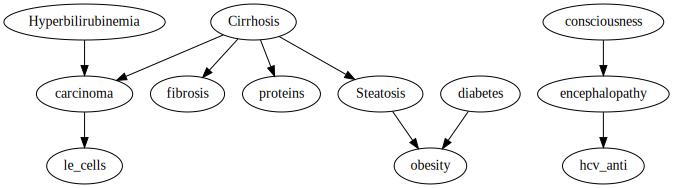

In [13]:
results[3].causal_graph.draw()

- We can take a look at all the results.

In [14]:
display(HTML(all_results.to_html()))

,No. of Features Req.,Causal Algorithm,Feature Selection Method,AUPRC,SHD
0,20,PC,LINEAR_REGRESSION,0.103895,112
1,20,RFCI-continuous,LINEAR_REGRESSION,0.103895,112
2,20,PC,RANDOM_FOREST,0.262117,100
3,20,RFCI-continuous,RANDOM_FOREST,0.262117,100
4,19,PC,LINEAR_REGRESSION,0.078822,112
5,19,RFCI-continuous,LINEAR_REGRESSION,0.078822,112
6,19,PC,RANDOM_FOREST,0.284844,99
7,19,RFCI-continuous,RANDOM_FOREST,0.284844,99
8,18,PC,LINEAR_REGRESSION,0.091428,109
9,18,RFCI-continuous,LINEAR_REGRESSION,0.096922,108


- We can now plot the SHD and AUPRC for the run.

In [61]:
shd_min = []
for s in range(11, 21):
    shd = all_results.loc[all_results['No. of Features Req.'] == s]['SHD'].min()
    shd_min.append(shd)

        
auprc_max = []
for a in range(11, 21):
    auprc = all_results.loc[all_results['No. of Features Req.'] == a]['AUPRC'].max()
    auprc_max.append(auprc)

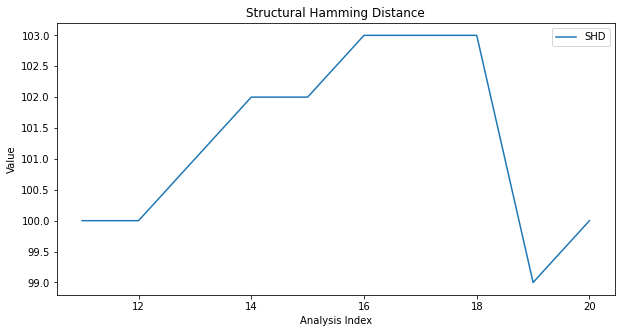

In [60]:
plt.rcParams["figure.figsize"] = (10, 5)

plt.plot(np.arange(11,21), shd_min, label='SHD')
plt.title('Structural Hamming Distance')
plt.xlabel('Analysis Index')
plt.ylabel('Value')
plt.legend()
plt.show()

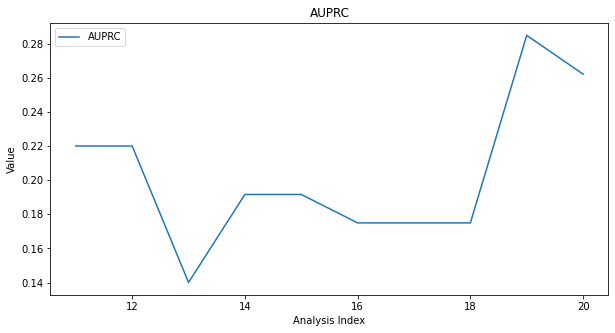

In [63]:
plt.rcParams["figure.figsize"] = (10, 5)

plt.plot(np.arange(11,21), auprc_max, label='AUPRC')
plt.title('AUPRC')
plt.xlabel('Analysis Index')
plt.ylabel('Value')
plt.legend()
plt.show()

From the graphs and the results, it would be worth doing a narrower causal discovery run:
- From the `PC` and `RFCI-continuous` causal discovery algorithms.
- Using the features supplied by the random forest classifier.

This is brief indication of what AitiaExplorer can provide - a way of testing multiple methods of producing a causal graph from a dataset to see which looks the most promising.